In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.utils.loaders import load_image_dataset, load_images

In [2]:
train_data_folder_path = '/media/babinsinko/Expansion/Projects/lumen-melanoma-gradientclippers/data/train'
test_data_folder_path = '/media/babinsinko/Expansion/Projects/lumen-melanoma-gradientclippers/data/test'
train_metadata_path = '/media/babinsinko/Expansion/Projects/lumen-melanoma-gradientclippers/data/ISIC_2020_Training_GroundTruth.csv'
test_metadata_path = '/media/babinsinko/Expansion/Projects/lumen-melanoma-gradientclippers/data/ISIC_2020_Test_Metadata.csv'

In [3]:
train_df = load_image_dataset(train_data_folder_path, train_metadata_path, dtypes={
    'sex': 'category', 
    'anatom_site_general': 'category', 
    'diagnosis': 'category', 
    'benign_malignant': 'category'
})
train_df.head()

,image,patient,sex,age_approx,anatom_site_general,diagnosis,benign_malignant,target,image_path
id,,,,,,,,,
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0,/media/babinsinko/Expansion/Projects/lumen-mel...
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0,/media/babinsinko/Expansion/Projects/lumen-mel...
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0,/media/babinsinko/Expansion/Projects/lumen-mel...
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0,/media/babinsinko/Expansion/Projects/lumen-mel...
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0,/media/babinsinko/Expansion/Projects/lumen-mel...


In [4]:
test_df = load_image_dataset(test_data_folder_path, test_metadata_path)
test_df.head()

,image,patient,age_approx,anatom_site_general,sex,image_path
id,,,,,,
0,ISIC_0052060,IP_3579794,70,NaN,male,/media/babinsinko/Expansion/Projects/lumen-mel...
1,ISIC_0052349,IP_7782715,40,lower extremity,male,/media/babinsinko/Expansion/Projects/lumen-mel...
2,ISIC_0058510,IP_7960270,55,torso,female,/media/babinsinko/Expansion/Projects/lumen-mel...
3,ISIC_0073313,IP_6375035,50,torso,female,/media/babinsinko/Expansion/Projects/lumen-mel...
4,ISIC_0073502,IP_0589375,45,lower extremity,female,/media/babinsinko/Expansion/Projects/lumen-mel...


ISIC_0470465, shape = (2848, 4288, 3)


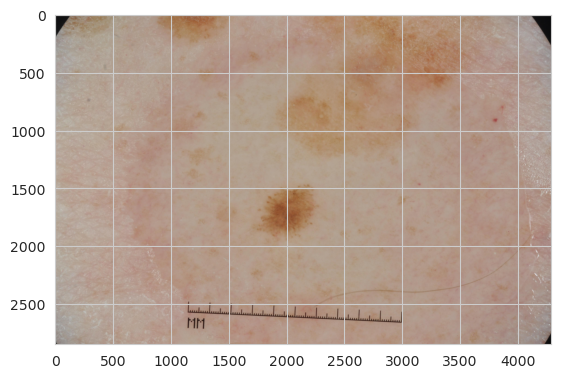

ISIC_4564430, shape = (1080, 1920, 3)


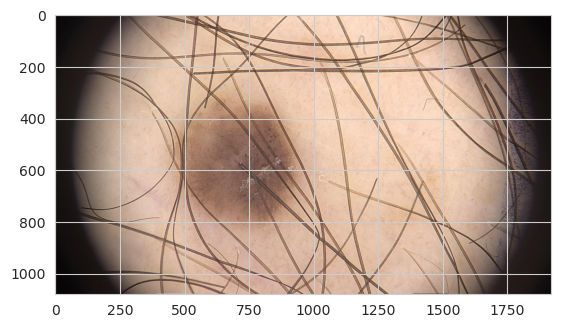

ISIC_7957811, shape = (4000, 6000, 3)


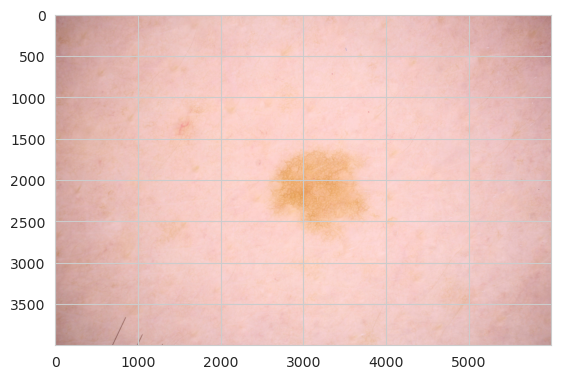

ISIC_0208233, shape = (1080, 1920, 3)


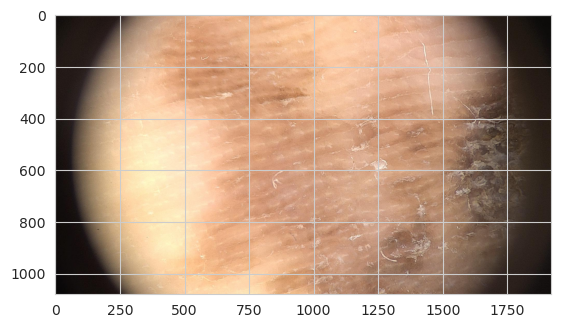

ISIC_4214570, shape = (3024, 4032, 3)


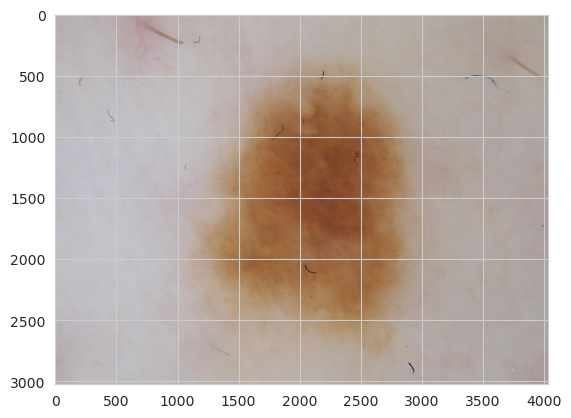

ISIC_2232480, shape = (480, 640, 3)


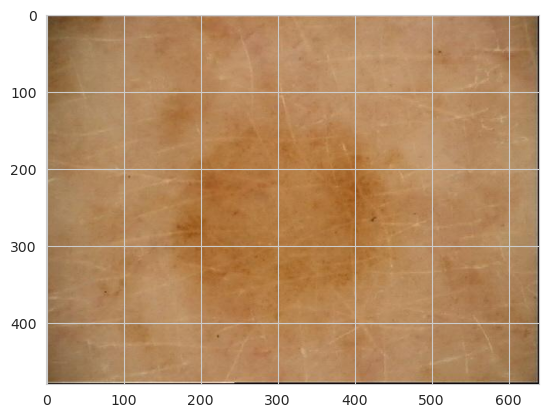

ISIC_0197440, shape = (1080, 1920, 3)


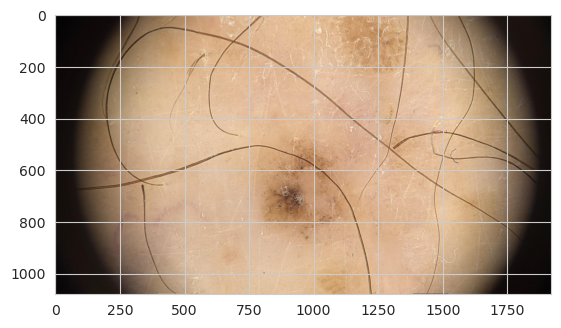

ISIC_6483925, shape = (4000, 6000, 3)


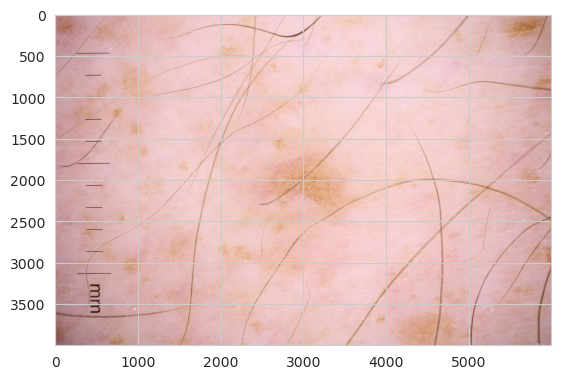

ISIC_2893969, shape = (3456, 5184, 3)


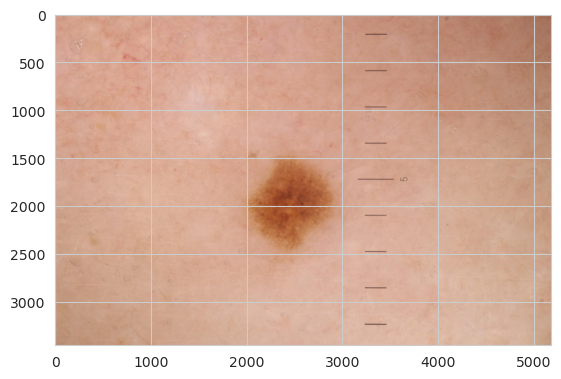

ISIC_8818310, shape = (1080, 1920, 3)


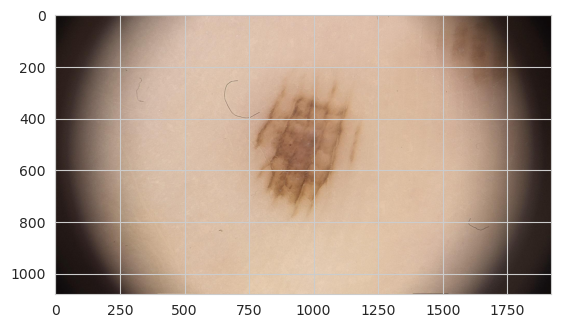

In [15]:
limit = 10
for _, image_data in zip(range(limit), load_images(test_df['image_path'].to_list(), 10)):
    image_name, image = image_data
    print(f'{image_name}, shape = {image.shape}')
    plt.imshow(image, cmap='gray')
    plt.show()

In [16]:
image_means = [np.mean(image) for _, image in load_images(train_df['image_path'].to_list(), 1000)]

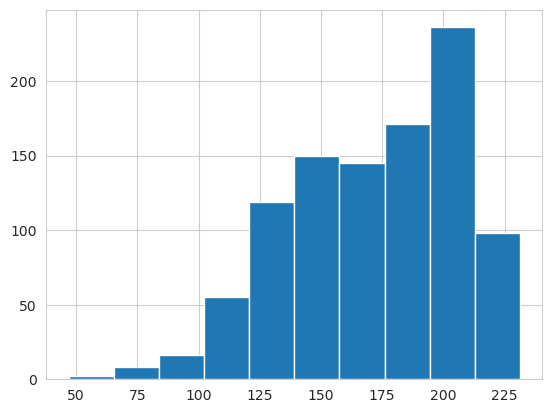

In [17]:
plt.hist(image_means)
plt.show()

In [11]:
numeric_train_df = train_df[['age_approx', 'target']]
numeric_train_df

,age_approx,target
id,,
0,45.0,0
1,45.0,0
2,50.0,0
3,45.0,0
4,55.0,0
...,...,...
33121,50.0,0
33122,65.0,0
33123,20.0,0


In [13]:
corr = numeric_train_df.corr()
corr

,age_approx,target
age_approx,1.000000,0.086388
target,0.086388,1.000000


<Axes: >

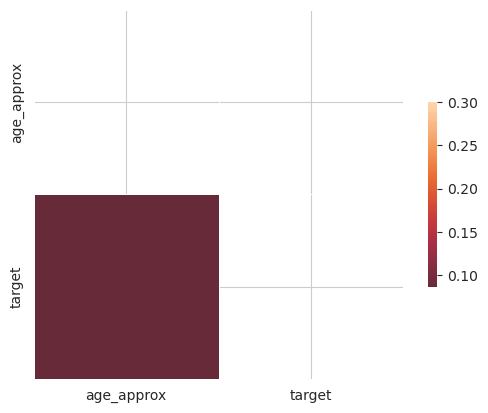

In [12]:

mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
